### Salary Prediction with Hitters Dataset 
Name :- Hrithik Deep


**overview**:

 

This notebook aims to predict the salaries of baseball players using various regression models. We will explore, preprocess, and model the data to find the best approach for salary prediction.


# 2. Data Loading and Overview

Let's load the dataset and take an initial look at its structure.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Hitters.csv')
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


# 3. Exploratory Data Analysis (EDA)

Let's explore the data to understand its structure and spot any issues.


**3.1 missing value**

In [6]:
#  Check for missing values

df.isnull().sum()


AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

**3.2 Data type**

In [9]:
# Display data types
df.dtypes


AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object

**3.3 Descriptive statistics**

In [12]:
# Summary statistics
df.describe()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


**3.4 Categorical Variable Distribution**

In [15]:
# Value counts for categorical columns

for col in ['League', 'Division', 'NewLeague']:
    print(df[col].value_counts())


League
A    175
N    147
Name: count, dtype: int64
Division
W    165
E    157
Name: count, dtype: int64
NewLeague
A    176
N    146
Name: count, dtype: int64


**3.5. Target Variable Distribution**

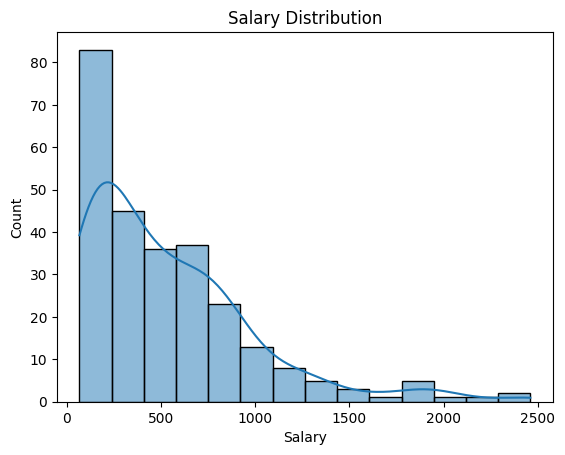

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Salary
sns.histplot(df['Salary'].dropna(), kde=True)
plt.title('Salary Distribution')
plt.show()


# 4. Data Visualization

Visualize relationships and patterns in the data.


**4.1  Correlation Heatmap**

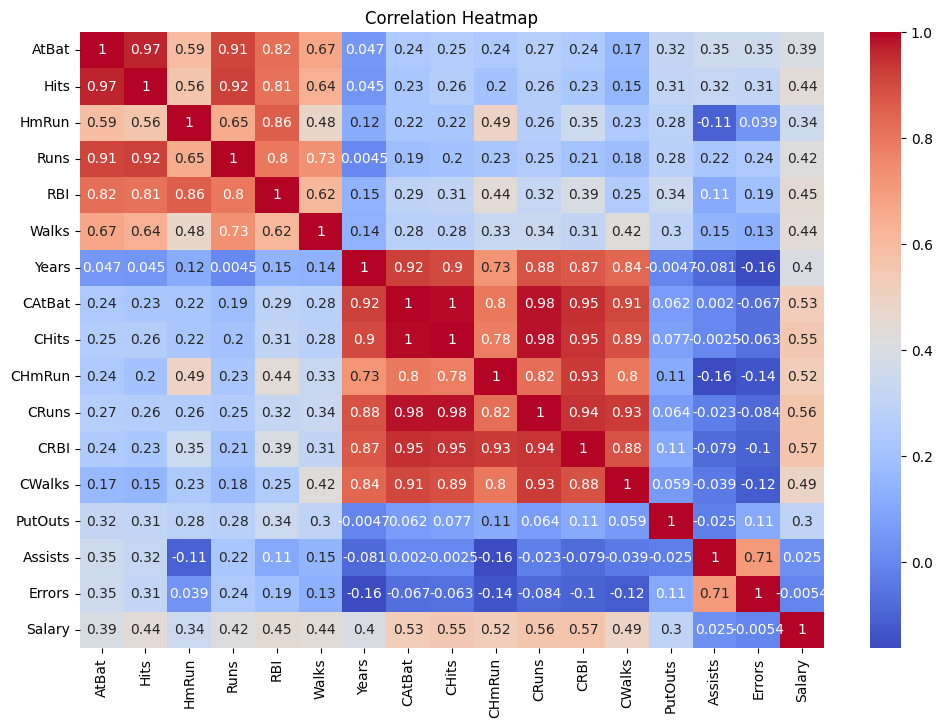

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**4.2. Feature Relationships**

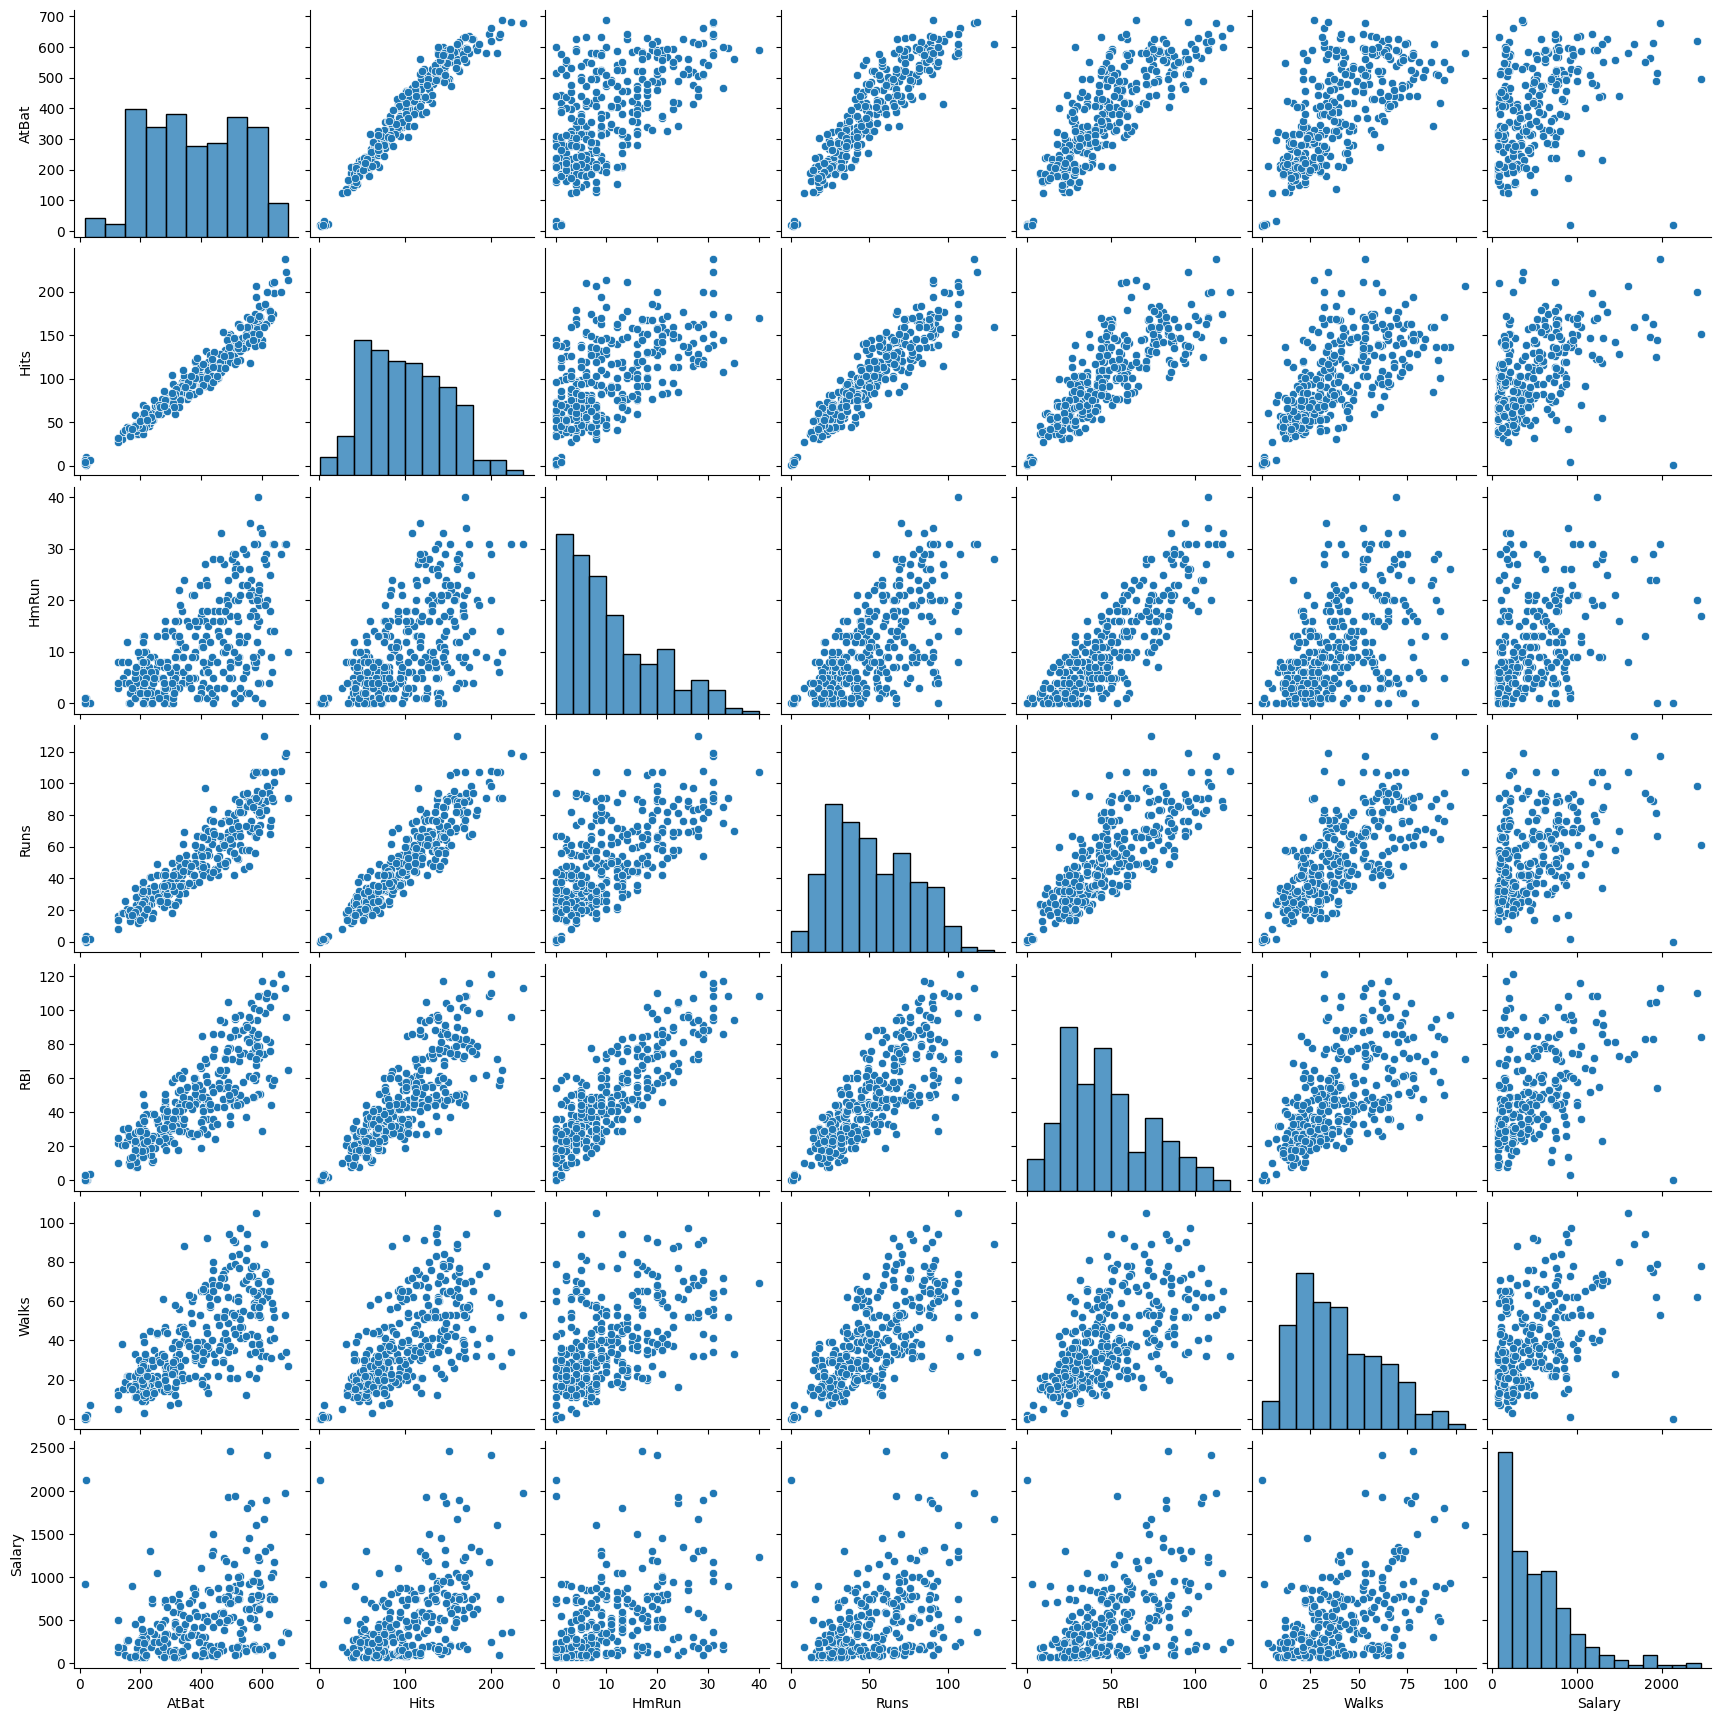

In [25]:
# Pairplot for selected features vs Salary

sns.pairplot(df, vars=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Salary'])
plt.show()


**4.3. Boxplots**

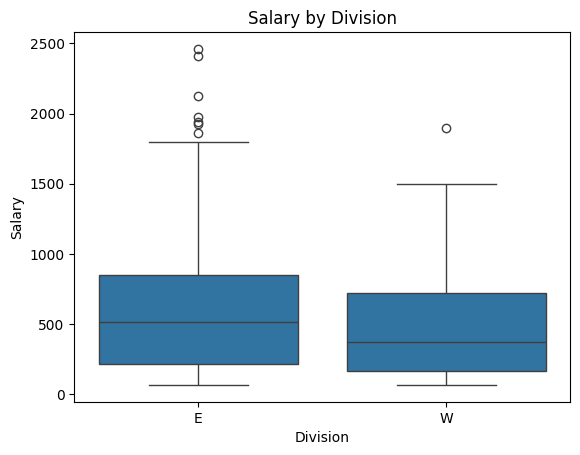

In [27]:
# Boxplot of Salary by Division

sns.boxplot(x='Division', y='Salary', data=df)
plt.title('Salary by Division')
plt.show()


# 5. Data Preprocessing

Prepare the data for modeling by handling missing values, encoding categorical variables, and scaling features.


**5.1. Handling Missing Values**

In [32]:
# Fill missing Salary values with median (or drop rows)

df['Salary'].fillna(df['Salary'].median(), inplace=True)


**5.2. Encoding Categorical Variables**

In [35]:
print(df.columns)


Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


**5.3. Feature Scaling**


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Salary')
df[num_cols] = scaler.fit_transform(df[num_cols])


# 6. Feature Engineering 

Create or transform features to improve model performance.


In [41]:
# Example: Create a feature for batting average
df['BattingAverage'] = df['Hits'] / df['AtBat']


# 7. Model Preparation

Split the data into training and testing sets and define features and target.


**8.1. Train-Test Split**

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8. Model Building

Train and evaluate various regression models.


**9.1. Linear Regression (Baseline)**

In [55]:
print(df.dtypes)


AtBat             float64
Hits              float64
HmRun             float64
Runs              float64
RBI               float64
Walks             float64
Years             float64
CAtBat            float64
CHits             float64
CHmRun            float64
CRuns             float64
CRBI              float64
CWalks            float64
League             object
Division           object
PutOuts           float64
Assists           float64
Errors            float64
Salary            float64
NewLeague          object
BattingAverage    float64
dtype: object


### Encode All Categorical Columns
I can use pandas’ get_dummies to encode all object columns at once:

In [57]:
# Automatically find and encode all object (categorical) columns

categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [59]:
print(df.dtypes)


AtBat             float64
Hits              float64
HmRun             float64
Runs              float64
RBI               float64
Walks             float64
Years             float64
CAtBat            float64
CHits             float64
CHmRun            float64
CRuns             float64
CRBI              float64
CWalks            float64
PutOuts           float64
Assists           float64
Errors            float64
Salary            float64
BattingAverage    float64
League_N             bool
Division_W           bool
NewLeague_N          bool
dtype: object


In [146]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression RMSE:', mean_squared_error(y_test, y_pred_lr, squared=False))
print('Linear Regression R2:', r2_score(y_test, y_pred_lr))


Linear Regression RMSE: 360.19237776040285
Linear Regression R2: 0.3248583960432856


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**8.2. K-Nearest Neighbors Regression**

In [76]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('KNN RMSE:', mean_squared_error(y_test, y_pred_knn, squared=False))
print('KNN R2:', r2_score(y_test, y_pred_knn))


KNN RMSE: 324.59359010407223
KNN R2: 0.4517158220772389


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**8.3. Support Vector Regression**

In [79]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

print('SVR RMSE:', mean_squared_error(y_test, y_pred_svr, squared))
print('SVR R2:', r2_score(y_test, y_pred_svr))


SVR RMSE: 454.5679466205352
SVR R2: -0.07528466445928061


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**8.4. Decision Tree Regression**

In [172]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Decision Tree RMSE:', mean_squared_error(y_test, y_pred_dt, ))
print('Decision Tree R2:', r2_score(y_test, y_pred_dt))


Decision Tree RMSE: 159108.74224787691
Decision Tree R2: 0.1720199410623483


**8.5. Random Forest Regression**

In [163]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest RMSE:', mean_squared_error(y_test, y_pred_rf, ))
print('Random Forest R2:', r2_score(y_test, y_pred_rf))


Random Forest RMSE: 87266.92020408834
Random Forest R2: 0.5458749235706906


**8.6. Gradient Boosting Machines (GBM)**

In [161]:
from sklearn.ensemble import GradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

print('GBM RMSE:', mean_squared_error(y_test, y_pred_gbm, ))
print('GBM R2:', r2_score(y_test, y_pred_gbm))


GBM RMSE: 100255.71198609601
GBM R2: 0.47828303368923375


**8.7. XGBoost**

In [159]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

print('XGBoost RMSE:', mean_squared_error(y_test, y_pred_xgb, ))
print('XGBoost R2:', r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 138400.66997235556
XGBoost R2: 0.27978190725563024


**8.8. LightGBM**

In [152]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(random_state=42)
lgb_reg.fit(X_train, y_train)
y_pred_lgb = lgb_reg.predict(X_test)

print('LightGBM RMSE:', mean_squared_error(y_test, y_pred_lgb, ))
print('LightGBM R2:', r2_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1113
[LightGBM] [Info] Number of data points in the train set: 257, number of used features: 20
[LightGBM] [Info] Start training from score 506.933879
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

**9.9. CatBoost**

In [150]:
from catboost import CatBoostRegressor

cat_reg = CatBoostRegressor(verbose=0, random_state=42)
cat_reg.fit(X_train, y_train)
y_pred_cat = cat_reg.predict(X_test)

print('CatBoost RMSE:', mean_squared_error(y_test, y_pred_cat, ))
print('CatBoost R2:', r2_score(y_test, y_pred_cat))


CatBoost RMSE: 102038.75500703132
CatBoost R2: 0.4690043225090371


# 9. Model Comparison

Compare the performance of all models.


In [148]:
from sklearn.metrics import root_mean_squared_error, r2_score

results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVR', 'Decision Tree', 'Random Forest', 'GBM', 'XGBoost', 'LightGBM', 'CatBoost'],
    'RMSE': [
        root_mean_squared_error(y_test, y_pred_lr),
        root_mean_squared_error(y_test, y_pred_knn),
        root_mean_squared_error(y_test, y_pred_svr),
        root_mean_squared_error(y_test, y_pred_dt),
        root_mean_squared_error(y_test, y_pred_rf),
        root_mean_squared_error(y_test, y_pred_gbm),
        root_mean_squared_error(y_test, y_pred_xgb),
        root_mean_squared_error(y_test, y_pred_lgb),
        root_mean_squared_error(y_test, y_pred_cat)
    ],
    'R2': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gbm),
        r2_score(y_test, y_pred_xgb),
        r2_score(y_test, y_pred_lgb),
        r2_score(y_test, y_pred_cat)
    ]
})
results.sort_values(by='RMSE')


,Model,RMSE,R2
4,Random Forest,295.409750,0.545875
7,LightGBM,302.546198,0.523669
5,GBM,316.631824,0.478283
8,CatBoost,319.435056,0.469004
1,KNN,324.593590,0.451716
0,Linear Regression,360.192378,0.324858
6,XGBoost,372.022405,0.279782
3,Decision Tree,398.884372,0.172020
2,SVR,454.567947,-0.075285


# 10. Hyperparameter Tuning (Optional)

Optimize the best model's parameters for improved performance.


In [122]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10]
}
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)


Best Parameters: {'max_depth': 5, 'n_estimators': 200}


# 11. Feature Importance Analysis

Identify the most important features in the best-performing model.


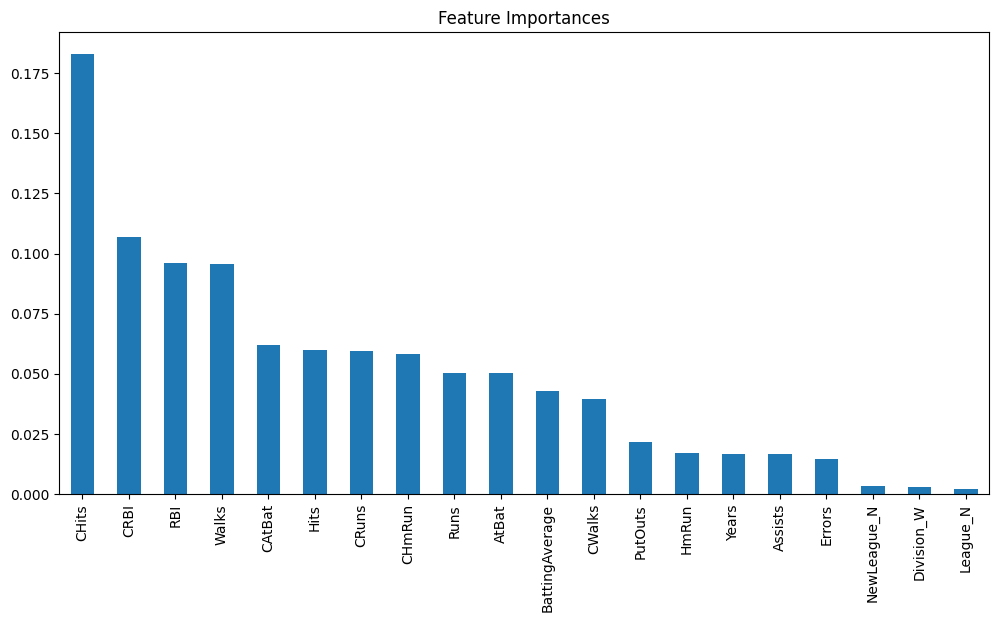

In [125]:
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,6))
plt.title('Feature Importances')
plt.show()


# 12. Final Model and Predictions

Retrain the best model and make predictions on the test set.


In [128]:
# Assuming Random Forest is the best
best_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

# Show sample predictions
pd.DataFrame({'Actual': y_test, 'Predicted': final_preds}).head()


,Actual,Predicted
173,425.0,207.596719
132,325.0,468.229135
197,425.0,256.203146
9,1100.0,706.920420
104,425.0,758.513380


# 13. Conclusion

Summarize the project, discuss model performance, and suggest potential improvements.


# 14. References

- [Kaggle Hitters Dataset](https://www.kaggle.com/)
- [Scikit-learn Documentation](https://scikit-learn.org/)
- [Pandas Documentation](https://pandas.pydata.org/)
